# Importing libraries

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Loading data

In [37]:
data_1=pd.read_csv("tested.csv")
data_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# EDA

In [38]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [39]:
df_num = data_1[["Age","SibSp","Parch","Fare"]]
df_cat = data_1[["Survived","Sex","Cabin","Embarked","Ticket"]]

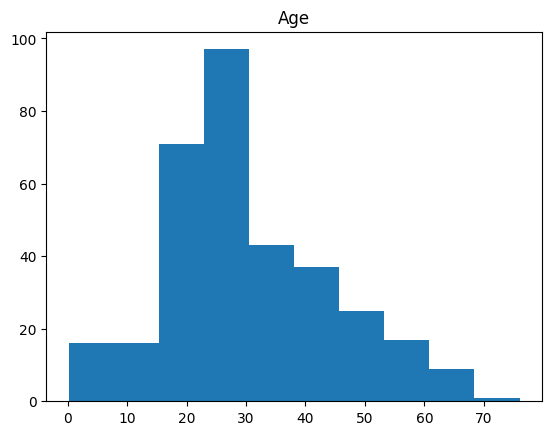

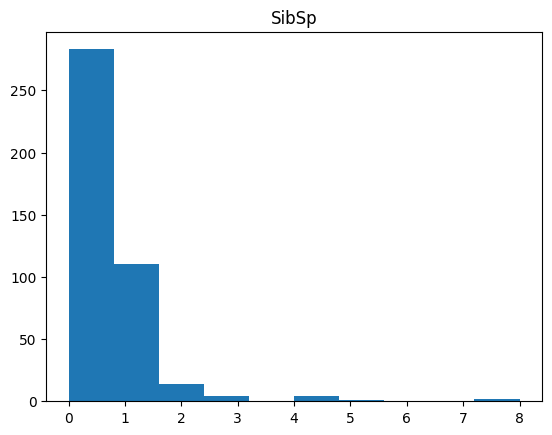

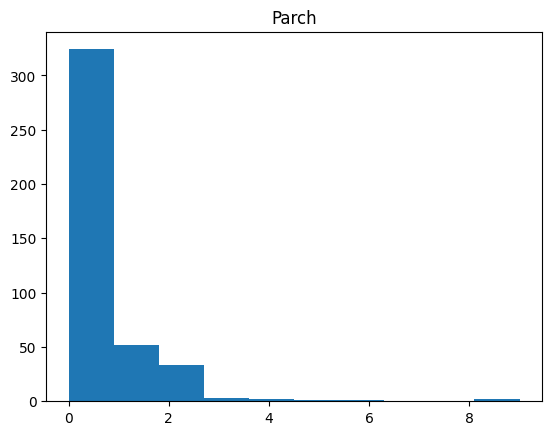

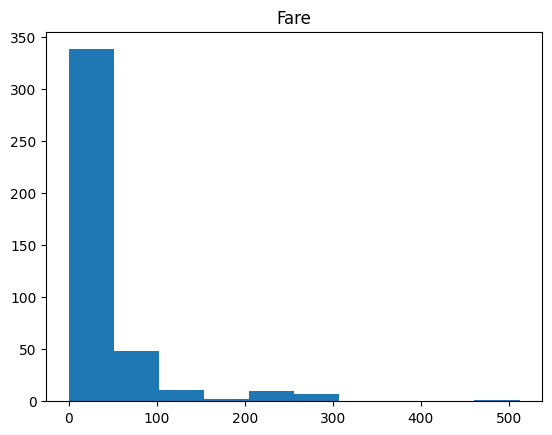

In [40]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

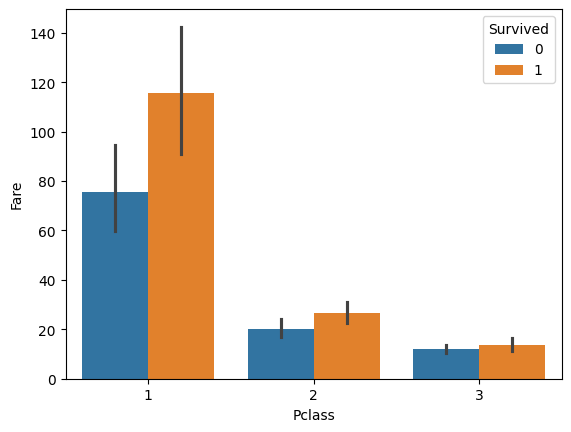

In [41]:
sns.barplot(data=data_1,x="Pclass",y="Fare",hue="Survived")

In [42]:
pd.pivot_table(data_1,index="Survived",values=["Age","SibSp","Parch","Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.272732,27.527877,0.274436,0.379699
1,30.272362,49.747699,0.598684,0.565789


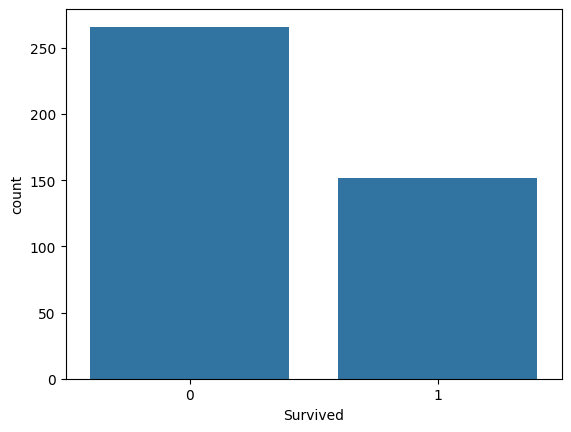

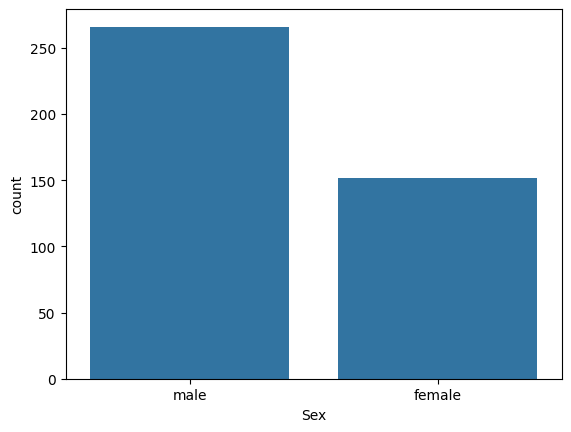

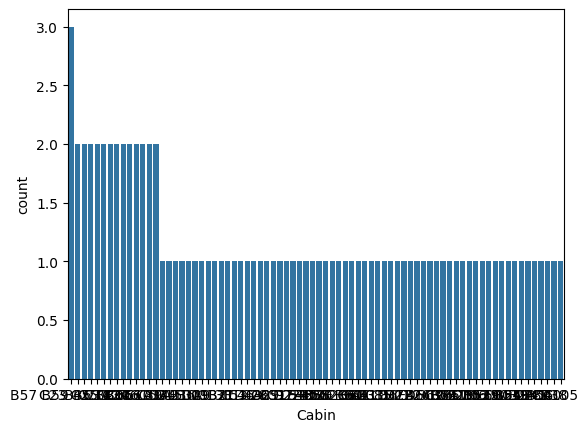

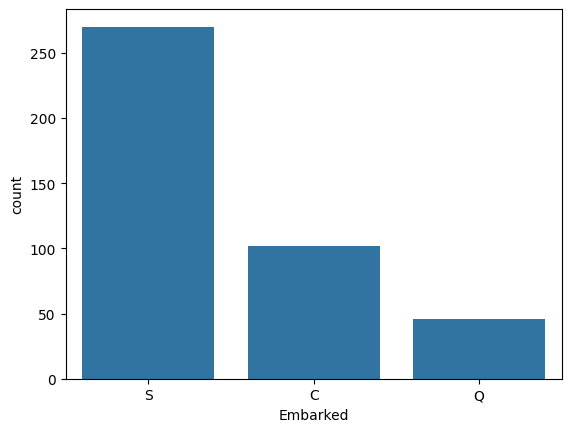

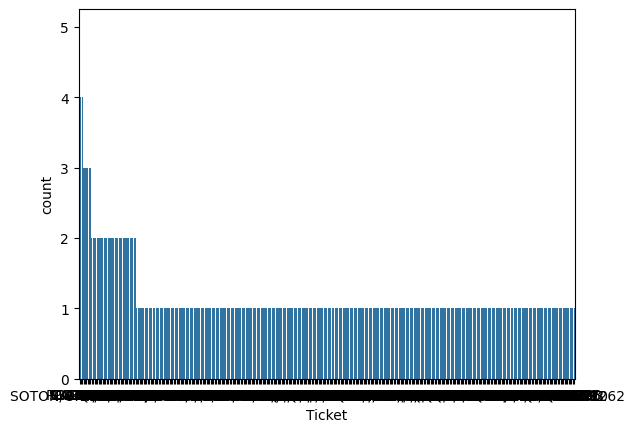

In [43]:
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index,y=df_cat[i].value_counts())
    plt.show()

In [44]:
x=pd.DataFrame(
    (
        pd.pivot_table(
            data_1,
            index="Survived",
            columns="Sex",
            values="Ticket",
            aggfunc="count",
        )
    )
)
print()
print(
    pd.pivot_table(
        data_1,index="Survived", columns="Pclass",values="Ticket",aggfunc="count"
    )
)
print()
print(
    pd.pivot_table(
        data_1,
        index="Survived",
        columns="Pclass",
        values="Ticket",
        aggfunc="count",
    )
)
print()
x
    


Pclass     1   2    3
Survived             
0         57  63  146
1         50  30   72

Pclass     1   2    3
Survived             
0         57  63  146
1         50  30   72



Sex,female,male
Survived,,
0,NaN,266.0
1,152.0,NaN


# Data  cleaning

In [45]:
data_1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [46]:
data_1["Age"] = data_1["Age"].fillna(data_1["Age"].mean())

In [47]:
data_1["Embarked"]=data_1["Embarked"].fillna(data_1["Embarked"].mode()[0])

In [48]:
data_1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Feature Engineering

In [49]:
data_1["Fare"] = np.log(data_1["Fare"]+1)

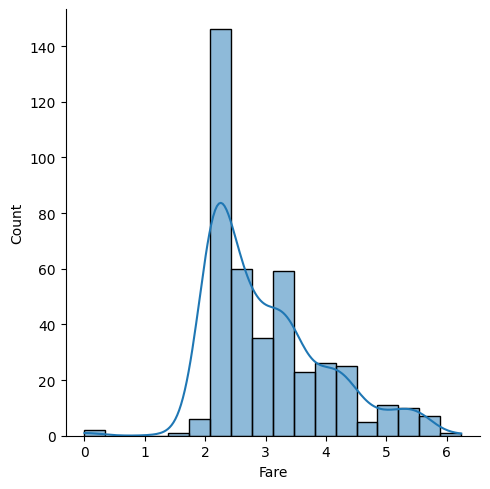

In [50]:

sns.displot(data_1["Fare"],kde=True)

<Axes: >

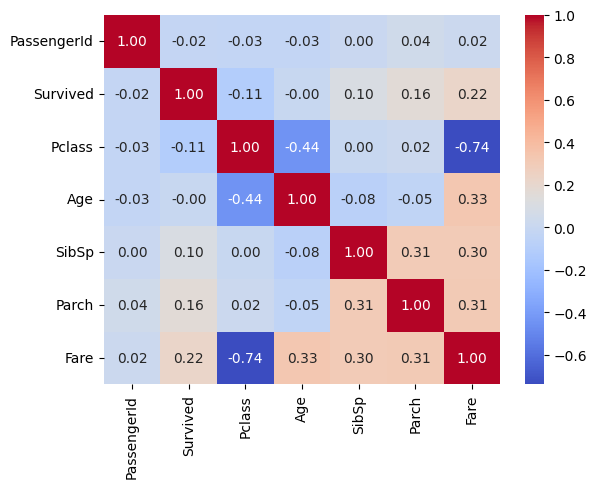

In [51]:
corr = data_1.corr(numeric_only=True)
sns.heatmap(corr,annot=True, fmt =".2f",cmap="coolwarm")

In [52]:
from sklearn.preprocessing import LabelEncoder

cols = ["Sex", "Embarked"]
le = LabelEncoder()
for col in cols:
    data_1[col] = le.fit_transform(data_1[col])

data_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,2.178064,NaN,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,2.079442,NaN,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,2.369075,NaN,1
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,2.268252,NaN,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,2.586824,NaN,2


In [53]:
X = data_1.drop(columns=["Survived"], axis=1)
y = data_1["Survived"]
data_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.50000,0,0,330911,2.178064,NaN,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,2.079442,NaN,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,2.369075,NaN,1
3,895,0,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,2.268252,NaN,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,2.586824,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,2.202765,NaN,2
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,4.699571,C105,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,2.110213,NaN,2
416,1308,0,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,2.202765,NaN,2


# Encoding Categorical Columns


In [54]:

data_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.50000,0,0,330911,2.178064,NaN,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,2.079442,NaN,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,2.369075,NaN,1
3,895,0,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,2.268252,NaN,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,2.586824,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,2.202765,NaN,2
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,4.699571,C105,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,2.110213,NaN,2
416,1308,0,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,2.202765,NaN,2


In [55]:
data_1["Sex"].value_counts()

Sex
1    266
0    152
Name: count, dtype: int64

In [56]:
data_1["Embarked"].value_counts()

Embarked
2    270
0    102
1     46
Name: count, dtype: int64

In [57]:
data_1['Embarked']=data_1['Embarked'].map({'S':0,'C':1,'Q':2})

In [58]:
data_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,2.178064,NaN,NaN
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,2.079442,NaN,NaN
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,2.369075,NaN,NaN
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,2.268252,NaN,NaN
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,2.586824,NaN,NaN


In [59]:
data_1['Sex']=data_1['Sex'].map({'female':1,'male':0})

In [60]:
data_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",NaN,34.5,0,0,330911,2.178064,NaN,NaN
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",NaN,47.0,1,0,363272,2.079442,NaN,NaN
2,894,0,2,"Myles, Mr. Thomas Francis",NaN,62.0,0,0,240276,2.369075,NaN,NaN
3,895,0,3,"Wirz, Mr. Albert",NaN,27.0,0,0,315154,2.268252,NaN,NaN
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",NaN,22.0,1,1,3101298,2.586824,NaN,NaN


# Setting up the Parameters for the Model


In [61]:
print(X.head()) 

   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2          894       2                     Myles, Mr. Thomas Francis    1   
3          895       3                              Wirz, Mr. Albert    1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   

    Age  SibSp  Parch   Ticket      Fare Cabin  Embarked  
0  34.5      0      0   330911  2.178064   NaN         1  
1  47.0      1      0   363272  2.079442   NaN         2  
2  62.0      0      0   240276  2.369075   NaN         1  
3  27.0      0      0   315154  2.268252   NaN         2  
4  22.0      1      1  3101298  2.586824   NaN         2  


In [62]:
import pandas as pd

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first=True prevents multicollinearity


In [63]:
print(X_encoded.head())


   PassengerId  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked  \
0          892       3    1  34.5      0      0  2.178064         1   
1          893       3    0  47.0      1      0  2.079442         2   
2          894       2    1  62.0      0      0  2.369075         1   
3          895       3    1  27.0      0      0  2.268252         2   
4          896       3    0  22.0      1      1  2.586824         2   

   Name_Abelseth, Miss. Karen Marie  Name_Abelseth, Mr. Olaus Jorgensen  ...  \
0                             False                               False  ...   
1                             False                               False  ...   
2                             False                               False  ...   
3                             False                               False  ...   
4                             False                               False  ...   

   Cabin_E52  Cabin_E60  Cabin_F  Cabin_F E46  Cabin_F E57  Cabin_F G63  \
0      False     

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Assume you have the following DataFrame `X` (features) and `y` (target)
# Apply One-Hot Encoding to convert categorical columns into dummy variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Now you can proceed with the classification
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=40)
    
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test))

    score = cross_val_score(model, X_encoded, y, cv=5)
    print("CV SCORE:", score.mean())

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier()
classify(model)


Accuracy: 1.0
CV SCORE: 1.0


In [65]:
!pip install lightgbm

In [78]:
# One-Hot Encode the categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first to avoid multicollinearity


In [79]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
classify(model)

Accuracy: 1.0
CV SCORE: 1.0


In [80]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy: 1.0
CV SCORE: 1.0


In [81]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
classify(model)

C:\Users\My PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 1.0


C:\Users\My PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\My PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

CV SCORE: 1.0


In [82]:
X_test = data_1.drop(columns=["PassengerId","Name","Cabin","Ticket"],axis=1)
X_test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,NaN,34.50000,0,0,2.178064,NaN
1,1,3,NaN,47.00000,1,0,2.079442,NaN
2,0,2,NaN,62.00000,0,0,2.369075,NaN
3,0,3,NaN,27.00000,0,0,2.268252,NaN
4,1,3,NaN,22.00000,1,1,2.586824,NaN
...,...,...,...,...,...,...,...,...
413,0,3,NaN,30.27259,0,0,2.202765,NaN
414,1,1,NaN,39.00000,0,0,4.699571,NaN
415,0,3,NaN,38.50000,0,0,2.110213,NaN
416,0,3,NaN,30.27259,0,0,2.202765,NaN


In [83]:
from sklearn.preprocessing import LabelEncoder
cols = ["Sex", "Embarked"]
le = LabelEncoder()
for col in cols:
    X_test[col] = le.fit_transform(X_test[col])
X_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,2.178064,0
1,1,3,0,47.0,1,0,2.079442,0
2,0,2,0,62.0,0,0,2.369075,0
3,0,3,0,27.0,0,0,2.268252,0
4,1,3,0,22.0,1,1,2.586824,0


In [84]:
X_test["Age"] = X_test["Age"].fillna(X_test["Age"].mean())
X_test["Fare"] = X_test["Fare"].fillna(X_test["Fare"].mean())
X_test.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Data Preprocessing

In [85]:
X_test = data_1.drop(columns=["PassengerId","Name","Cabin","Ticket"],axis=1)
X_test["Age"] = X_test["Age"].fillna(X_test["Age"].mean())
X_test["Fare"] = X_test["Fare"].fillna(X_test["Fare"].mean())
X_test.isnull().sum()
from sklearn.preprocessing import LabelEncoder
cols = ["Sex","Embarked"]
le = LabelEncoder()
for col in cols:
    X_test[col] = le.fit_transform(X_test[col])

X_test.head()
X_test


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.50000,0,0,2.178064,0
1,1,3,0,47.00000,1,0,2.079442,0
2,0,2,0,62.00000,0,0,2.369075,0
3,0,3,0,27.00000,0,0,2.268252,0
4,1,3,0,22.00000,1,1,2.586824,0
...,...,...,...,...,...,...,...,...
413,0,3,0,30.27259,0,0,2.202765,0
414,1,1,0,39.00000,0,0,4.699571,0
415,0,3,0,38.50000,0,0,2.110213,0
416,0,3,0,30.27259,0,0,2.202765,0


# Model Testing

In [86]:

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv("tested.csv")

df = df.drop(columns=["Name", "Ticket", "Cabin"])  # optional depending on your dataset

df = df.dropna()

X = df.drop("Survived", axis=1)
y = df["Survived"]

categorical_cols = ["Sex", "Embarked"]
numerical_cols = ["Age", "Fare", "Pclass", "SibSp", "Parch"]

categorical_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols),
    ]
)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

pred = model.predict(X_test)

# === Evaluate ===
acc = accuracy_score(y_test, pred)
print(f"Accuracy: {acc:.2f}")


Accuracy: 1.00


In [87]:
pred = model.predict(X_test)
pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0])

# Test Submission

In [88]:
import pandas as pd
submit = pd.read_csv('gender_submission.csv')
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [93]:
print(len(pred))          # Should be 418
print(submit.shape[0])    # Number of rows in the submit DataFrame


67
418


In [98]:
submit = submit.reset_index(drop=True)
pred = pd.Series(pred).reset_index(drop=True)
submit["Survived"] = pred


In [100]:
submit["Survived"] = pred
submit

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,1.0
4,896,0.0
...,...,...
413,1305,NaN
414,1306,NaN
415,1307,NaN
416,1308,NaN


In [101]:
submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     67 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 6.7 KB


In [102]:
submit.to_csv("submission.csv", index=False)